In [1]:
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

conn = sqlite3.connect("../db/baltasar.db")
def sql(query):
    return pd.read_sql_query(query, conn)

In [2]:
d = sql('''
SELECT degree, degree * count(*)/ (SELECT 2.0*count(*) FROM Transfer) as perc FROM AddressMetadata 
GROUP BY degree
ORDER BY degree ASC''')

d['cdf'] = d['perc'].cumsum() * 100
d[' '] = 'Fraction Of Transfers'

In [3]:
cnt = sql('''
SELECT degree, count(*)/ (SELECT 1.0*count(*) FROM AddressMetadata) as perc FROM AddressMetadata 
GROUP BY degree
ORDER BY degree ASC''')

cnt['cdf'] = cnt['perc'].cumsum() * 100
cnt[' '] = 'Fraction of Addresses'

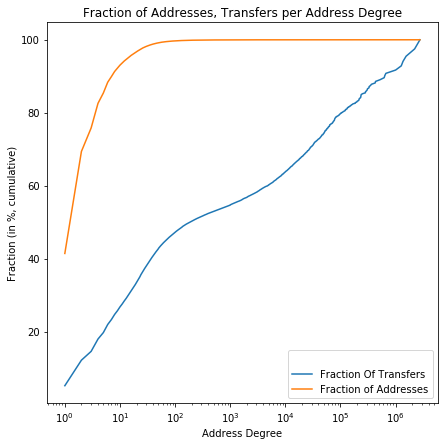

In [4]:
a = pd.concat([d, cnt])
f, ax = plt.subplots(figsize=(7, 7))
ax.set(xscale="log")
sns.lineplot(data=a, x='degree', y='cdf', ax=ax, hue=' ')
ax.set_ylabel("Fraction (in %, cumulative)")
ax.set_xlabel("Address Degree")
ax.set_title('Fraction of Addresses, Transfers per Address Degree')
#sns.lineplot(data=cnt, x='degree', y='cdf', ax=ax)
plt.savefig("fig.pdf") 

In [5]:
sql('''select count(*) from address''')

,count(*)
0,13861166
